<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/15_MNIST_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###-*- coding: utf-8 -*-
### 라이브러리 호출


In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf



Using TensorFlow backend.


### seed 값 설정


In [0]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)



### MNIST 데이터 불러오기


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)



11493376/11490434 [==============================] - 2s 0us/step


### 모델 프레임 설정


In [0]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))



### 모델 실행 환경 설정


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



### 모델 최적화 설정


In [0]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)



### 모델의 실행


In [7]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])




Epoch 00001: val_loss improved from inf to 0.15426, saving model to ./model/01-0.1543.hdf5

Epoch 00002: val_loss improved from 0.15426 to 0.10422, saving model to ./model/02-0.1042.hdf5

Epoch 00003: val_loss improved from 0.10422 to 0.08489, saving model to ./model/03-0.0849.hdf5

Epoch 00004: val_loss improved from 0.08489 to 0.07692, saving model to ./model/04-0.0769.hdf5

Epoch 00005: val_loss improved from 0.07692 to 0.06917, saving model to ./model/05-0.0692.hdf5

Epoch 00006: val_loss improved from 0.06917 to 0.06106, saving model to ./model/06-0.0611.hdf5

Epoch 00007: val_loss did not improve from 0.06106

Epoch 00008: val_loss improved from 0.06106 to 0.05864, saving model to ./model/08-0.0586.hdf5

Epoch 00009: val_loss improved from 0.05864 to 0.05645, saving model to ./model/09-0.0565.hdf5

Epoch 00010: val_loss did not improve from 0.05645

Epoch 00011: val_loss did not improve from 0.05645

Epoch 00012: val_loss did not improve from 0.05645

Epoch 00013: val_loss did n

### 테스트 정확도 출력


In [8]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



10000/10000 [==============================] - 0s 46us/step

 Test Accuracy: 0.9826


### 테스트 셋의 오차


In [0]:
y_vloss = history.history['val_loss']



### 학습셋의 오차


In [0]:
y_loss = history.history['loss']



### 그래프로 표현


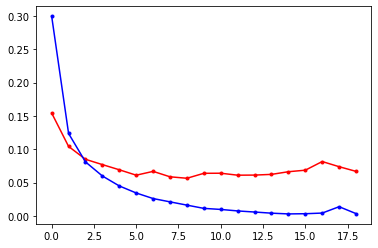

In [11]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')



### 그래프에 그리드를 주고 레이블을 표시


No handles with labels found to put in legend.


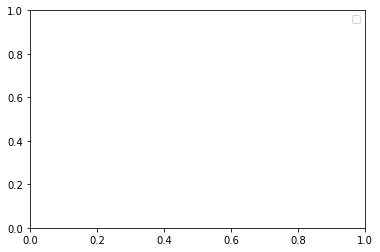

In [12]:
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])

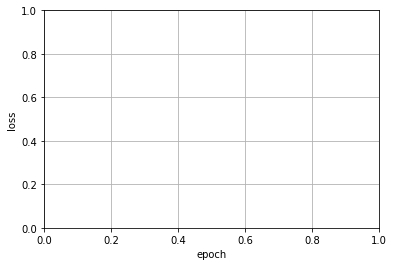

In [13]:
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
